# Load Data from an Intan RHD file.
### Header information (and saved data, if present) will be stored in the *result* variable. You'll also be able to specify a channel's name to plot its recorded data as an example of accessing data from *result*.

In [1]:
# Load the background Python functions that allow for data loading and plotting
%run importrhdutilities.py

### Name of file to load. To load a different file, move it to the same directory as this notebook, and change the following 'filename' variable to point the name of your file.

In [2]:
filename = 'gel2_0 min_230516_145630.rhd' # Change this variable to load a different data file
result, data_present = load_file(filename)


Reading Intan Technologies RHD2000 Data File, Version 3.0

Found 32 amplifier channels.
Found 3 auxiliary input channels.
Found 0 supply voltage channels.
Found 0 board ADC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

File contains 14.355 seconds of data.  Amplifiers were sampled at 20.00 kS/s.

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
100% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 0.3 seconds


In [3]:
channel_all = ['A-001','A-002','A-003','A-004','A-005','A-006','A-007','A-008','A-009','A-010','A-011','A-012','A-013','A-014','A-015','A-016','A-017','A-018','A-019','A-020'
              ,'A-021','A-022','A-023','A-024','A-025','A-026','A-027','A-028','A-029','A-030','A-031','A-032']
import pandas as pd
time_data = pd.DataFrame(result['t_amplifier'],columns = ['time'])
ecg_data = pd.DataFrame(result['amplifier_data']).T
ecg_data.columns = channel_all
ecg_data = pd.concat([time_data,ecg_data], axis=1).set_index('time')
#ecg_data.to_csv('s5 p1_230210_172158.csv')
#result['amplifier_data'][0]
ecg_data.head()

,A-001,A-002,A-003,A-004,A-005,A-006,A-007,A-008,A-009,A-010,...,A-023,A-024,A-025,A-026,A-027,A-028,A-029,A-030,A-031,A-032
time,,,,,,,,,,,,,,,,,,,,,
0.00000,2.145,0.975,0.000,-7.215,-4.29,-1.755,-0.390,1.170,-62.205,-76.83,...,-5.655,-14.235,0.780,-1.170,-0.585,-1.170,2.535,-0.975,1.365,-1.365
0.00005,-0.195,-0.975,-1.560,-3.120,-0.39,2.145,-0.390,3.510,-61.815,-76.44,...,-5.460,-16.575,2.925,-0.390,1.560,-1.170,-0.585,-4.095,2.925,-2.925
0.00010,-2.535,-1.170,0.000,-3.120,0.78,1.755,-0.390,-1.170,-59.865,-76.05,...,-5.655,-17.160,0.975,-0.390,-2.730,-0.780,-0.585,-0.195,2.340,-1.560
0.00015,-2.535,-2.145,-0.585,-4.095,-2.73,2.340,1.365,0.975,-61.035,-76.05,...,-6.435,-19.110,-1.365,-1.365,-2.535,-0.195,-2.145,0.000,2.340,-1.170
0.00020,-4.680,-2.145,-5.265,-4.290,0.00,2.145,2.730,-0.585,-66.495,-77.61,...,-9.750,-21.450,0.195,-1.365,-2.730,-1.170,-0.585,-0.390,1.365,-2.145


In [4]:
ecg_data.drop(['A-001','A-002','A-003','A-004','A-005','A-006','A-007','A-008','A-025','A-026',
                       'A-027','A-028','A-029','A-030','A-031','A-032'],axis=1,inplace=True)

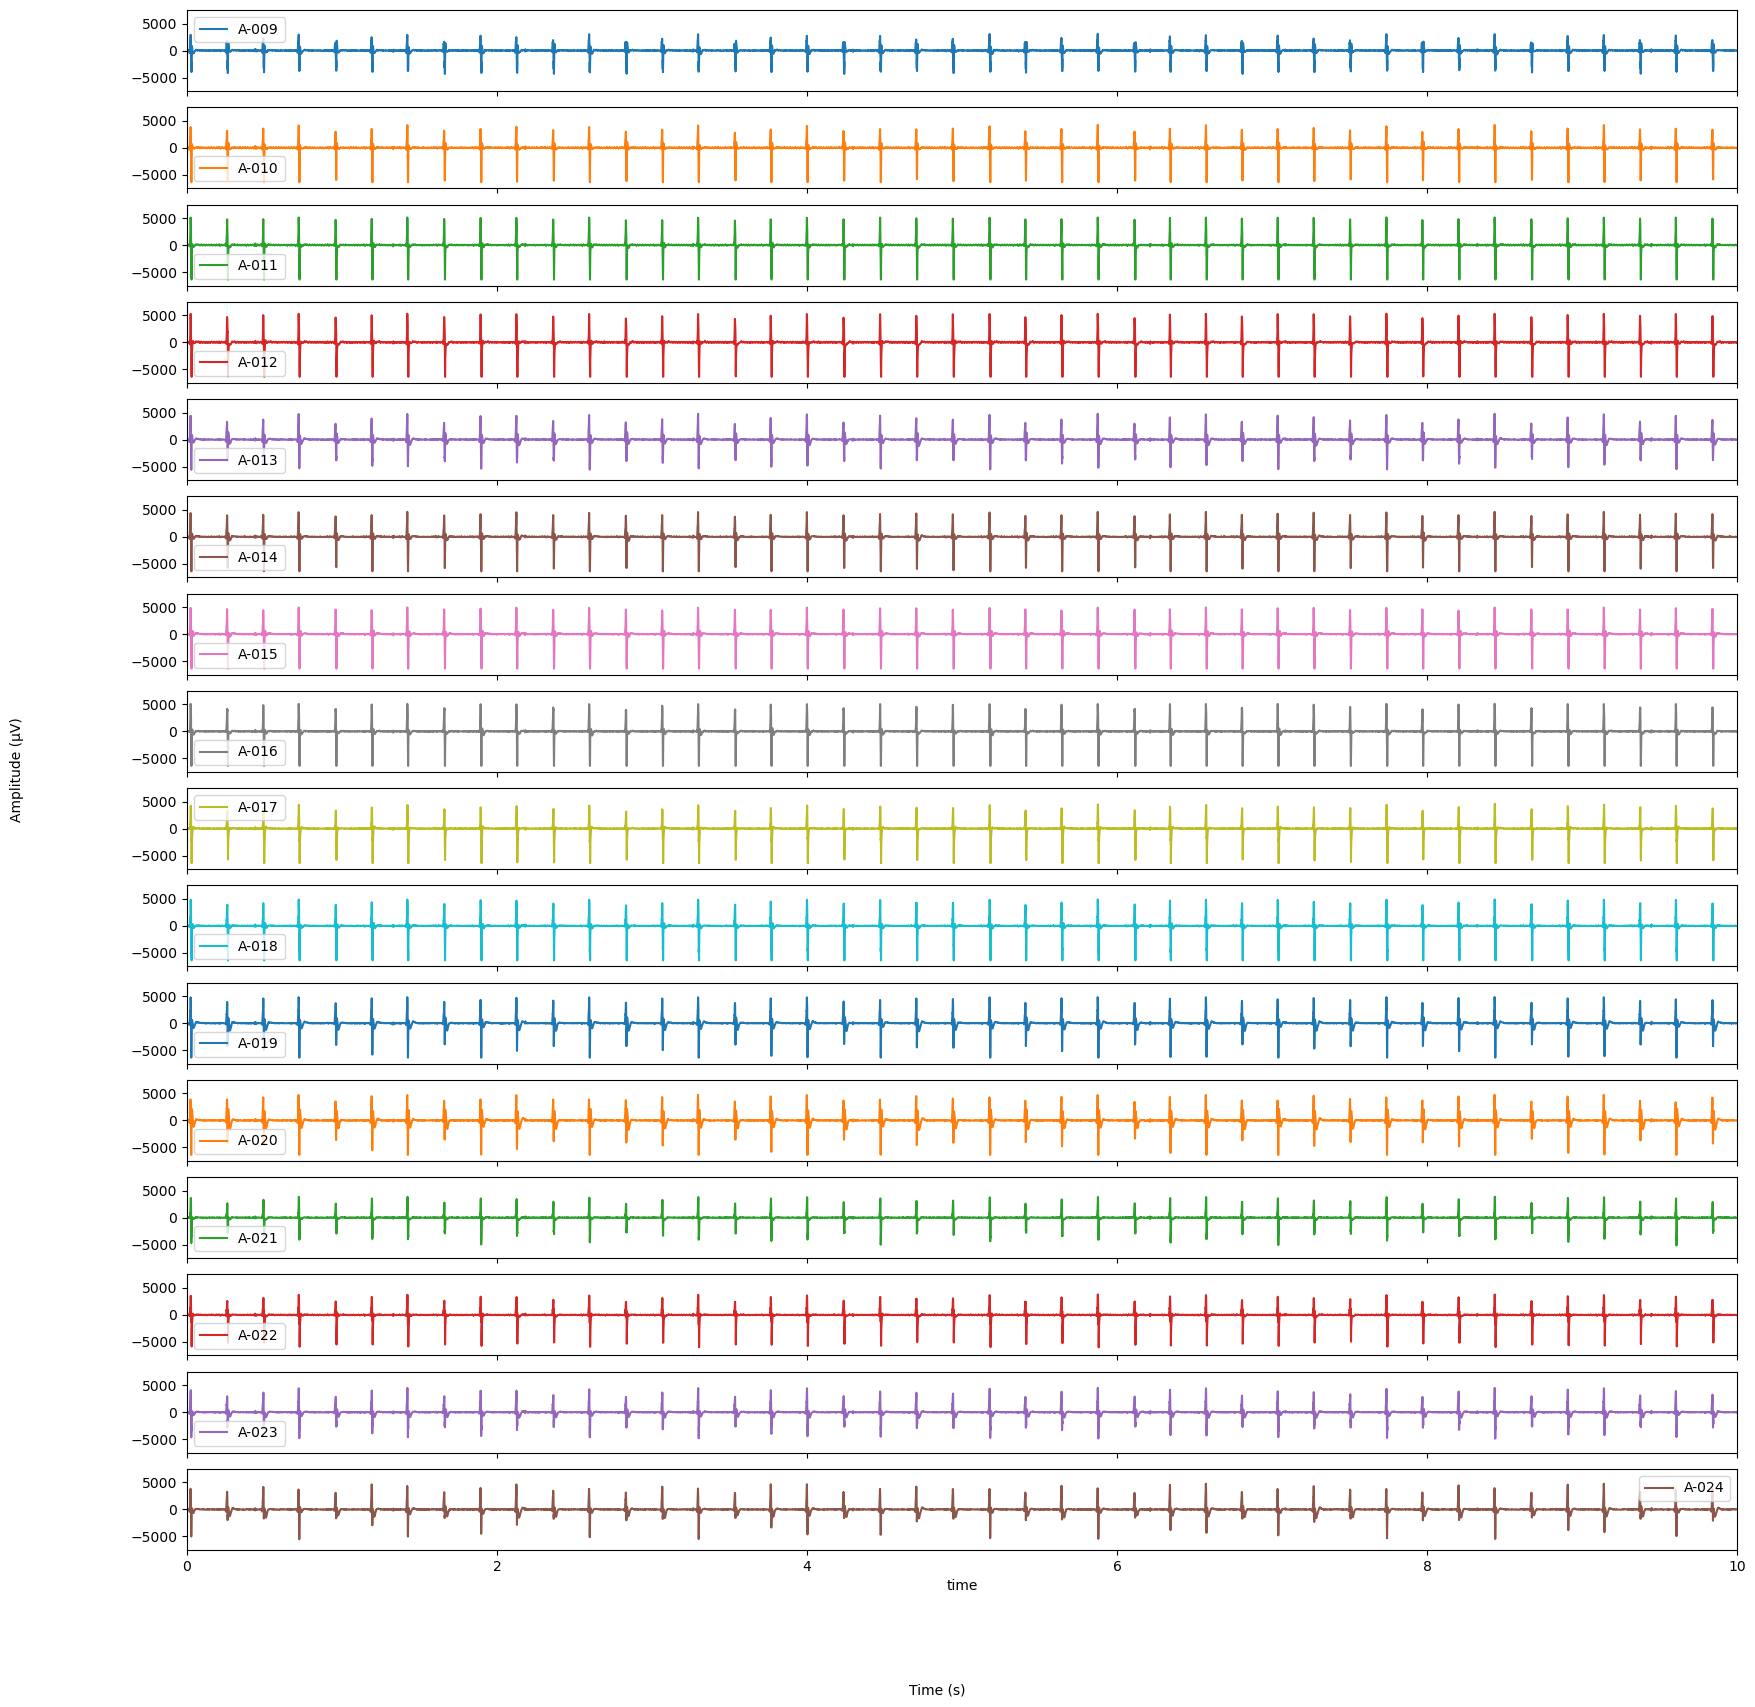

In [5]:
ecg_data.plot(subplots=True,figsize = (20,20))
for ax in plt.gcf().axes:
    ax.set_xlim([0,10])
    ax.set_ylim([-7500, 7500])
plt.gcf().text(0.04, 0.5, 'Amplitude (μV)', ha='center', va='center', rotation='vertical')
plt.gcf().text(0.5, 0.04, 'Time (s)', ha='center', va='center')
plt.legend(loc='upper right')

In [6]:
channel_sel = ['A-009','A-010','A-011','A-012','A-013','A-014','A-015','A-016','A-017','A-018','A-019','A-020'
              ,'A-021','A-022','A-023','A-024']
#for i in channel_sel:
    #plot_channel(i,result)

# Select certain range to evaluate

In [673]:
x1 = 1.15
x2 = 1.3
ecg_data = ecg_data.drop(ecg_data.index[int(x2*20000):])
ecg_data = ecg_data.drop(ecg_data.index[:int(x1*20000)])

In [674]:
#ecg_data.to_csv('gel2_0 min_230516_145630.csv')

# Check single channel

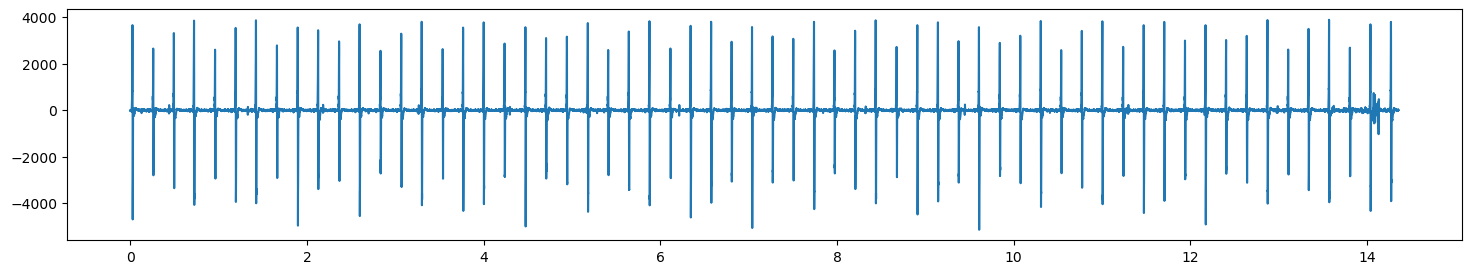

In [7]:
fig, ax = plt.subplots(figsize = (18,3))
ax.plot(ecg_data['A-021'])

# Find peaks

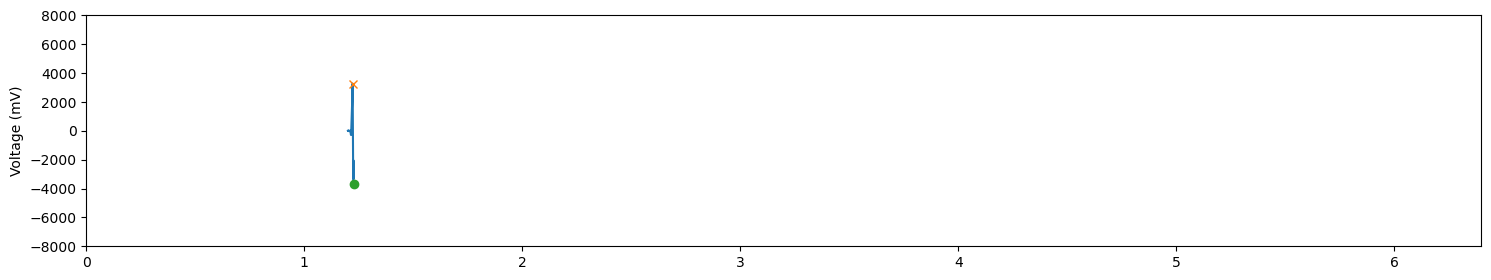

In [655]:
from scipy.signal import find_peaks
time = ecg_data.index
channel1 = ecg_data['A-009'].to_numpy()
peaks, _ = find_peaks(channel1,distance=3000) #To exlude smaller irrelevant peaks by distance only, may not be generalizable
peaks2, _ = find_peaks(-channel1,distance=3000)
peak_time = peaks/20000+x1
peak_time2 = peaks2/20000+x1
fig, ax = plt.subplots(figsize = (18,3))
ax.plot(time,channel1)
ax.set_xlim(0,6.4)
ax.set_ylim([-8000,8000])
ax.set_ylabel('Voltage (mV)')
ax.plot(peak_time, channel1[peaks], "x")
ax.plot(peak_time2, channel1[peaks2], "o")
#ax.plot(np.zeros_like(channel1), "--", color="gray")
plt.show()

# check result check time

In [656]:
result = ecg_data.to_numpy()
time = ecg_data.index.to_numpy()

In [657]:
time = ecg_data.index.to_numpy()
df = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df6 = pd.DataFrame()
for channels in result.T:
    peaks, _ = find_peaks(channels, distance = 3000)
    peaks2, _ = find_peaks(-channels, distance = 3000)
    #peak_time = peaks/20000-5.00105 
    peak_time = peaks/20000+x1
    peak_time2 = peaks2/20000+x1
    df_peak = pd.DataFrame(peak_time)
    df_peak_v = pd.DataFrame(channels[peaks])
    peak_v_abs = channels[peaks] - channels[peaks-800]
    peak_v_diff = channels[peaks] - channels[peaks2]
    noise = np.std((channels[peaks[0]-800:peaks[0]-600]))
    snr = peak_v_abs/noise
    snr_abs = peak_v_diff/noise
    df_snr = pd.DataFrame(snr)
    df_snr_abs = pd.DataFrame(snr_abs)
    df_peak_abs = pd.DataFrame(peak_v_abs)
    df_peak_diff = pd.DataFrame(peak_v_diff)
    df = pd.concat([df,df_peak], axis=1)
    df2 = pd.concat([df2,df_peak_v], axis=1)
    df3 = pd.concat([df3,df_peak_abs], axis=1)
    df4 = pd.concat([df4,df_snr], axis=1)
    df5 = pd.concat([df5,df_peak_diff], axis=1)
    df6 = pd.concat([df6,df_snr_abs], axis=1)
df.columns = channel_sel
df2.columns = channel_sel
df3.columns = channel_sel
df4.columns = channel_sel
df5.columns = channel_sel
df6.columns = channel_sel
#df.to_csv('m3_220419_173044_all_peaks.csv')
#df2.to_csv('6_Hydrogel_220721_155144_all_peaks_values.csv')
#df3.to_csv('gel8_thick_230511_193617_abs_amplitude.csv')
#df4.to_csv('gel8_thick_230511_193617_abs_SNR.csv')
df5.to_csv('gel2_300min_230516_195853_abs_diff_amplitude2.csv')
df6.to_csv('gel2_300min_230516_195853_abs_diff_SNR2.csv')

In [658]:
df5

,A-009,A-010,A-011,A-012,A-013,A-014,A-015,A-016,A-017,A-018,A-019,A-020,A-021,A-022,A-023,A-024
0,6965.4,10391.94,10439.13,5476.38,10059.27,11024.325,11403.405,11339.25,7022.535,9134.19,10978.305,10897.38,9258.99,9600.24,7452.9,9052.29


In [331]:
np.std((result.T[8][peaks[0]-600:peaks[1]-400]))

676.0126173093934

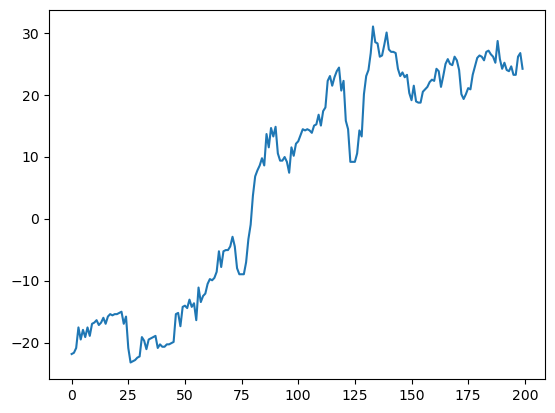

In [332]:
plt.plot((result.T[5][peaks[0]-600:peaks[0]-400]))

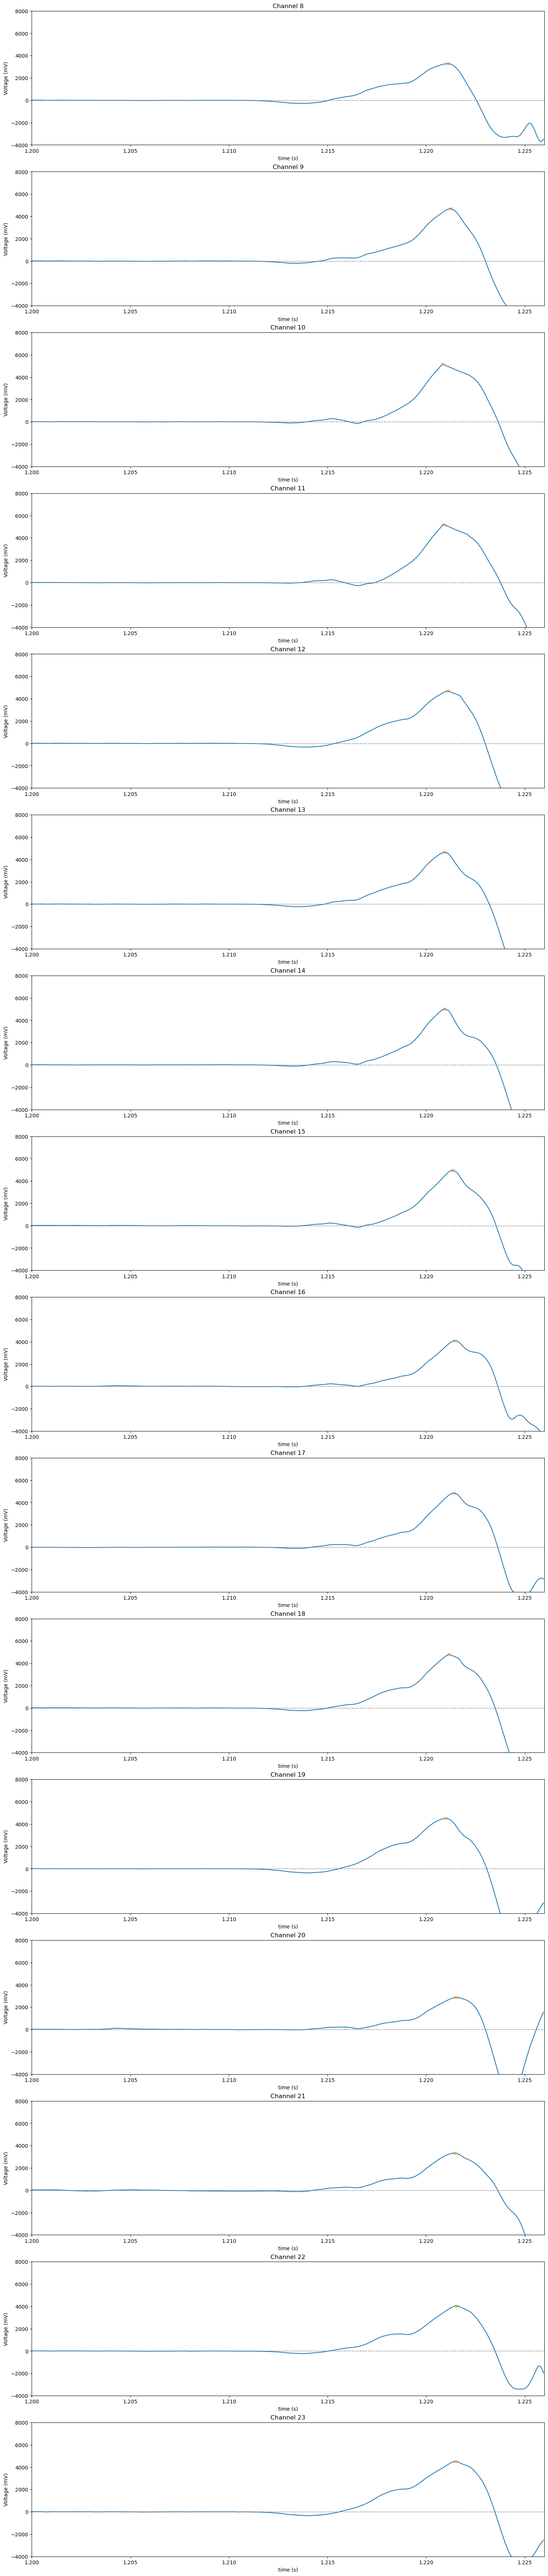

In [659]:
dfT = df.T
df2T = df2.T
fig, axes = plt.subplots(16,1,figsize = (18,90))
for i, ax in enumerate(axes.flatten()):
    m = i+8
    m = str(m)
    ax.plot(time,result.T[i])
    ax.plot(dfT.iloc[i],df2T.iloc[i],"x")
    ax.hlines(y=0, xmin=-5, xmax=15, linewidth=1, color='gray', linestyles = '--')
    ax.set_xlim([x1,x2])
    ax.set_ylim([-4000,8000])
    ax.set_ylabel('Voltage (mV)')
    ax.set_title('Channel '+ m)
    ax.set_xlabel('time (s)')
    #ax.set_xlim(-4.5,100)
#plt.show()
#plt.savefig('m3_220419_173044_peak_identified.png')

In [662]:
dfT = df.T
arr_df = dfT.to_numpy()
base = arr_df[2]
arr_base = np.tile(base,(16,1))
arr_norm = np.subtract(arr_df,arr_base)*1000
arr_norm

array([[0.25],
       [0.4 ],
       [0.  ],
       [0.05],
       [0.25],
       [0.1 ],
       [0.1 ],
       [0.5 ],
       [0.6 ],
       [0.55],
       [0.3 ],
       [0.15],
       [0.65],
       [0.6 ],
       [0.7 ],
       [0.65]])

In [ ]:
arr_df = [[0.13295],[0.1326],[0.13205],[0.13015],[0.13295],[0.1334],[0.13215],[0.12955],[0.129],[0.132],[0.1344],[0.13315],[0.12835],[0.1288],[0.1331],[0.13325]]
base = arr_df[12]
arr_base = np.tile(base,(16,1))
arr_norm = np.subtract(arr_df,arr_base)*1000
arr_norm

In [663]:
arr_norm_av = np.average(arr_norm,axis=1)
arr_norm_av

array([0.25, 0.4 , 0.  , 0.05, 0.25, 0.1 , 0.1 , 0.5 , 0.6 , 0.55, 0.3 ,
       0.15, 0.65, 0.6 , 0.7 , 0.65])

In [664]:
ecg_map = np.zeros(16)
#real_channel = [3,7,8,12,2,6,9,13,1,5,10,14,0,4,11,15]
#real_channel = [15,14,13,12,11,10,9,8,4,5,6,7,0,1,2,3]
real_channel = [3,2,1,0,7,6,5,4,8,9,10,11,12,13,14,15]
#real_channel = [12,8,7,3,13,9,6,2,14,10,5,1,15,11,4,0]

In [665]:
for i in range(16):
    ecg_map[i] = arr_norm_av[real_channel[i]]
ecg_2d = np.reshape(ecg_map,(4,4))
ecg_2d
#np.savetxt("granule filter_220906_195734_delay.csv", ecg_2d, delimiter=",")

array([[0.05, 0.  , 0.4 , 0.25],
       [0.5 , 0.1 , 0.1 , 0.25],
       [0.6 , 0.55, 0.3 , 0.15],
       [0.65, 0.6 , 0.7 , 0.65]])

In [ ]:
plt.subplot()
plt.imshow(ecg_2d, cmap='RdYlBu_r', interpolation = 'Gaussian')

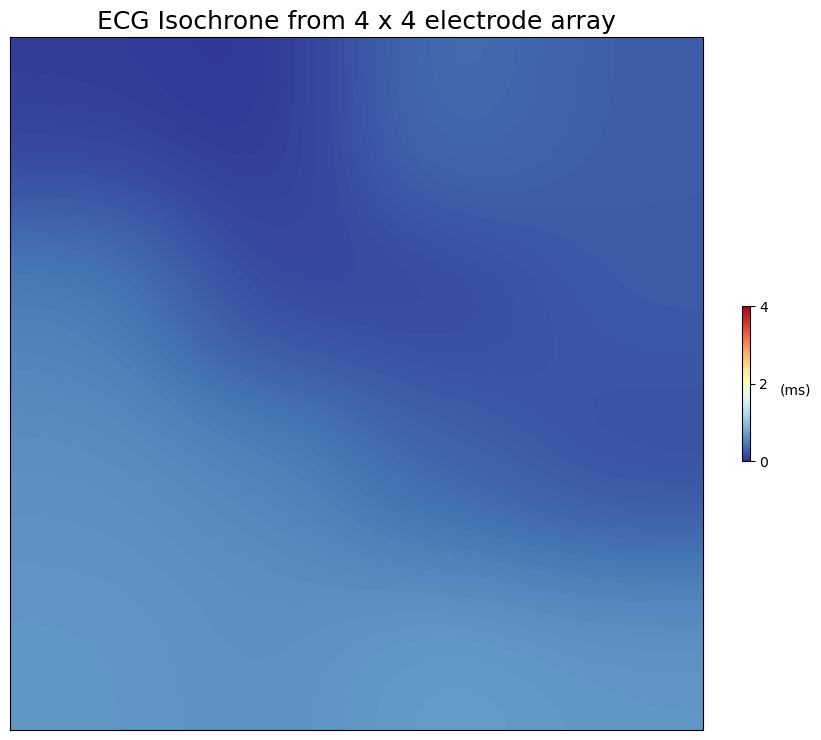

In [666]:
fig, ax = plt.subplots(figsize=(10,9))
heatmap = ax.imshow(ecg_2d, cmap='RdYlBu_r',interpolation = 'Gaussian')
ax.tick_params(left=False, bottom=False)
ax.set_title('ECG Isochrone from 4 x 4 electrode array',fontsize = 18)
ax.set_xticks([])
ax.set_yticks([])
cbar = fig.colorbar(heatmap,fraction=0.01,pad=0.05, shrink=0.4)
cbar.set_ticks([0, 2, 4])
heatmap.set_clim(vmin=0, vmax=4)
cbar.set_label('(ms)',rotation=0,labelpad=20)
plt.savefig('gel2_15min_230516_151137.eps')

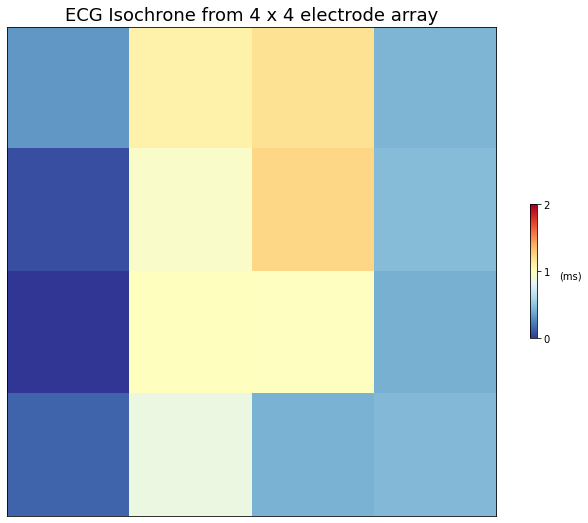

In [33]:
fig, ax = plt.subplots(figsize=(12,9))
heatmap = ax.imshow(ecg_2d, cmap='RdYlBu_r')
ax.tick_params(left=False, bottom=False)
ax.set_title('ECG Isochrone from 4 x 4 electrode array',fontsize = 18)
ax.set_xticks([])
ax.set_yticks([])
cbar = fig.colorbar(heatmap,fraction=0.01,pad=0.05, shrink=0.4)
cbar.set_ticks([0, 1, 2])
heatmap.set_clim(vmin=0, vmax=2)
cbar.set_label('(ms)',rotation=0,labelpad=20)
#plt.savefig('before_insitu_ctrl_220628_160655.png')